### Preprocessing the Data for a Neural Network

In [2]:
# from google.colab import drive

# drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install -q -U keras-tuner

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import pandas as pd 

In [4]:
# read the charity_data.csv.

# In Colab:
# colab_notebook_path = "/content/drive/My Drive/Colab Notebooks"
# application_df = pd.read_csv(colab_notebook_path + "/19_Resources/charity_data.csv")
# application_df.head()

# In Jupyter Notebook:
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Drop the non-beneficial ID columns, 'EIN'.
# Keep NAMES column to see binning will improve optimization.
application_df = application_df.drop(columns = ["EIN"])
print(application_df.shape)
application_df.head()

(34299, 11)


,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [7]:
# Look at NAME value counts for binning (19.3.3)
name_counts = application_df.NAME.value_counts()
name_counts

PARENT BOOSTER USA INC                                1260
TOPS CLUB INC                                          765
UNITED STATES BOWLING CONGRESS INC                     700
WASHINGTON STATE UNIVERSITY                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC        408
                                                      ... 
SUN AND SURF CHARITY                                     1
LOLO ANTONIO AND LOLA LOURDES ANCHETA                    1
NORTH EAST TRANSWOMENS ALLIANCE                          1
WILLIAMS MINISTRIES INC                                  1
MILITARY APPRECIATION RECOGNITION C ELEBRATION INC       1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

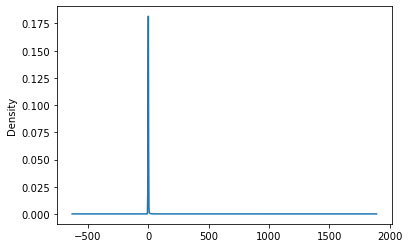

In [8]:
# Visualize the value counts of NAME
name_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ? (19.3.3)
replace_name = list(name_counts[name_counts <= 5].index)

# Replace in dataframe
for name in replace_name:
    application_df.NAME = application_df.NAME.replace(name,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                                         20043
PARENT BOOSTER USA INC                                         1260
TOPS CLUB INC                                                   765
UNITED STATES BOWLING CONGRESS INC                              700
WASHINGTON STATE UNIVERSITY                                     492
                                                              ...  
SOCIETY FOR CREATIVE ANACHRONISM                                  6
REFRIGERATION SERVICE ENGINEERS SOCIETY                           6
TEXAS FEDERATION OF WOMEN CLUBS                                   6
DEPARTMENT OF OREGON LADIES AUXILLARY TO THE VFW OF THE US        6
KIWANIS INTERNATIONAL                                             6
Name: NAME, Length: 355, dtype: int64

In [10]:
# Look at APPLICATION_TYPE value counts for binning (19.3.3)
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Determine which values to replace if counts are less than ? (19.3.3)
replace_application = list(application_type_counts[application_type_counts < 700].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [12]:
# Look at CLASSIFICATION value counts for binning (19.3.3)
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1370        1
C2170        1
C6100        1
C2570        1
C1236        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [13]:
# Determine which values to replace if counts are less than ..? (19.3.3)
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [14]:
# Look at SPECIAL_CONSIDERATIONS value counts for binning (19.3.3)
spec_counts = application_df.SPECIAL_CONSIDERATIONS.value_counts()
spec_counts

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [15]:
# Drop the SPECIAL_CONSIDERATIONS column because spec considerations make up <0.1% of data
application_df = application_df.drop(columns = ["SPECIAL_CONSIDERATIONS"])
print(application_df.shape)
application_df.head()

(34299, 10)


,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,Other,Independent,C1000,ProductDev,Association,1,0,5000,1
1,Other,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,Other,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,Other,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1


In [16]:
application_df.dtypes

NAME                object
APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
STATUS               int64
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [17]:
# Generate our categorical variable lists (19.4.2)
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [18]:
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [19]:
# Create a OneHotEncoder instance (19.4.3)
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,axis=1)
print(application_df.shape)
application_df.head()

(34299, 396)


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Save preprocessed DataFrame 
# Colab Notebook:
# application_df.to_csv(colab_notebook_path + "/19_Resources/application.csv", index=False)

# Jupyter Notebook:
application_df.to_csv("Resources/application.csv", index=False)

In [22]:
# Load preprocessed dataframe
# Colab Notebook:
# application_df = pd.read_csv(colab_notebook_path + "/19_Resources/application.csv")

# Jupyter Notebook:
application_df = pd.read_csv("Resources/application.csv")

print(application_df.shape)
application_df.head()

(34299, 396)


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Split our preprocessed data into our features and target arrays
#  Target
y = application_df["IS_SUCCESSFUL"].values
# Features
X = application_df.drop(["IS_SUCCESSFUL"],axis=1).values

In [24]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
number_input_features = len(X_train[0])
number_input_features

395

## Create a method that creates a new Sequential model with hyperparameter options

### Compile, Train and Evaluate the Model

In [27]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=100,
        step=2), activation=activation, input_dim=395))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=40,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
      
    return nn_model

In [28]:
# Import the kerastuner library
from tensorflow import keras
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [29]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,batch_size=64,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 08s]
val_accuracy: 0.7924198508262634

Best val_accuracy So Far: 0.7934693694114685
Total elapsed time: 00h 03m 47s
INFO:tensorflow:Oracle triggered exit


In [32]:
# Tuner results summary shows 10 best trials
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
activation: sigmoid
first_units: 87
num_layers: 5
units_0: 7
units_1: 33
units_2: 5
units_3: 37
units_4: 17
tuner/epochs: 20
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.7934693694114685
Trial summary
Hyperparameters:
activation: sigmoid
first_units: 25
num_layers: 5
units_0: 33
units_1: 31
units_2: 21
units_3: 9
units_4: 9
units_5: 33
tuner/epochs: 3
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.7934693694114685
Trial summary
Hyperparameters:
activation: sigmoid
first_units: 9
num_layers: 4
units_0: 5
units_1: 33
units_2: 1
units_3: 23
units_4: 15
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 5108c0ada00ca5eb2627a59a1ab15597
Score: 0.7931195497512817
Trial summary
Hyperparameters:
activation: sigmoid
first_units: 35
num_layers: 4
units_0: 9
units_1: 15
units_2: 

In [35]:
nn = tuner.get_best_models(num_models=1)[0]
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 87)                34452     
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 616       
_________________________________________________________________
dense_2 (Dense)              (None, 33)                264       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 170       
_________________________________________________________________
dense_4 (Dense)              (None, 37)                222       
_________________________________________________________________
dense_5 (Dense)              (None, 17)                646       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [36]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint, Callback

In [37]:
# Define the checkpoint path and filenames
# Colab Notebook:
# os.makedirs(colab_notebook_path +"/checkpoints2/",exist_ok=True)
# checkpoint_path = colab_notebook_path +"/checkpoints2/weights.{epoch:02d}.hdf5"

# Define the checkpoint path and filenames
os.makedirs("checkpoints2/",exist_ok=True)
checkpoint_path = "checkpoints2/weights.{epoch:02d}.hdf5"

In [38]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
# https://stackoverflow.com/questions/59069058/save-model-every-10-epochs-tensorflow-keras-v2

batch_size=32
steps_per_epoch = int(y_train.size / batch_size)
period = 5

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= period * steps_per_epoch)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,batch_size=32,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 758us/step - loss: 0.4247 - accuracy: 0.7953
Epoch 2/100
804/804 [==============================] - 1s 764us/step - loss: 0.4238 - accuracy: 0.7958
Epoch 3/100
804/804 [==============================] - 1s 773us/step - loss: 0.4237 - accuracy: 0.7960
Epoch 4/100
804/804 [==============================] - 1s 987us/step - loss: 0.4235 - accuracy: 0.7946
Epoch 5/100
760/804 [===========================>..] - ETA: 0s - loss: 0.4217 - accuracy: 0.7952
Epoch 00005: saving model to checkpoints2\weights.05.hdf5
804/804 [==============================] - 1s 758us/step - loss: 0.4213 - accuracy: 0.7952
Epoch 6/100
804/804 [==============================] - 1s 761us/step - loss: 0.4215 - accuracy: 0.7954
Epoch 7/100
804/804 [==============================] - 1s 750us/step - loss: 0.4207 - accuracy: 0.7963
Epoch 8/100
804/804 [==============================] - 1s 749us/step - loss: 0.4203 - accuracy: 0.7970
Epoch 9/100
804/804 [============

In [39]:
# Evaluate the model using the test data
model_loss, model_accuracy = test_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4642 - accuracy: 0.7874
Loss: 0.46416303515434265, Accuracy: 0.787405252456665


In [40]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")